In [1]:
# Import des librairies necessaire pour la classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Affectation du csv à une variable
datas = pd.read_csv("C46-Diabetes.csv")

In [3]:
# Visualiser les types des colonnes du dataframe
datas.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
# Visualisation du csv
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Verification des doublons dans le dataset
datas.duplicated().value_counts()

False    768
dtype: int64

In [6]:
# Vérification des données manquantes dans le csv
datas.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# verification des dimensions du dataset
datas.shape

(768, 9)

In [8]:
X = datas.drop(["Outcome"], axis=1)
y = datas.Outcome

In [9]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

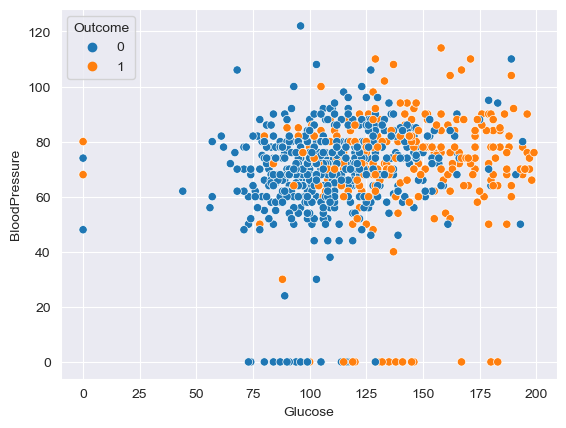

In [10]:
sns.scatterplot(x="Glucose", y="BloodPressure", data=datas, hue="Outcome")

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param = {"penalty": ["l1", "l2", "elasticnet"], "max_iter": [100, 200, 300, 400] }

lr = LogisticRegression()
classifier = GridSearchCV(lr, param, n_jobs=-1, cv=5)

In [26]:
classifier.fit(X_train, y_train)

C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [27]:
classifier.best_estimator_

LogisticRegression()

In [28]:
classifier.best_params_

{'max_iter': 100, 'penalty': 'l2'}

In [38]:
classifier.best_score_

0.7590430494468878

In [54]:
from sklearn.ensemble import RandomForestClassifier

param = {"n_estimators": list(range(900, 2000, 100)), "max_depth": [15, 20, 25]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param, n_jobs=-1, cv=10)

In [55]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [900, 1000, 1100, 1200, 1300, 1400,
                                          1500, 1600, 1700, 1800, 1900]})

In [56]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 1100}

In [57]:
clf.best_score_

0.7590428344791116